In [589]:
import numpy as np
import pandas as pd
import pickle
from sklearn import datasets # sklearn comes with some toy datasets to practise
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot
from sklearn.metrics import silhouette_score

import config
import spotipy
import json
from spotipy.oauth2 import SpotifyClientCredentials
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id= config.client_id,
                                                           client_secret= config.client_secret))
import pandas as pd
import seaborn as sns

In [590]:
X = pd.read_csv("/Users/divi/Documents/GitHub/DSIronLab/Allsongs.csv")


X.shape

(23839, 11)

In [468]:
X.describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,23839.000000,23839.000000,23839.000000,23839.000000,23839.000000,23839.000000,23839.000000,23839.000000,23839.000000,2.383900e+04
mean,0.518821,0.433980,-15.432062,0.134064,0.508062,0.337693,0.159229,0.386795,114.763788,1.899722e+05
std,0.213099,0.336537,11.837929,0.231479,0.398298,0.425258,0.122700,0.264280,32.309426,9.686111e+04
min,0.000000,0.000603,-47.898000,0.000000,0.000000,0.000000,0.010400,0.000000,0.000000,1.512800e+04
25%,0.370000,0.059400,-23.667500,0.039800,0.082400,0.000000,0.095500,0.151000,87.652000,1.428955e+05
50%,0.556000,0.447000,-10.221000,0.050200,0.487000,0.000269,0.111000,0.356000,115.099000,1.893210e+05
75%,0.689000,0.746000,-5.911000,0.086500,0.954000,0.870000,0.170000,0.589000,136.996000,2.309270e+05
max,0.982000,1.000000,1.519000,0.971000,0.996000,0.996000,0.990000,0.989000,232.124000,3.608000e+06


In [579]:
X_Num = X.select_dtypes(np.number)
X_Num=X_Num.drop(['duration_ms'],axis=1)

In [580]:
scaler = StandardScaler()
scaler.fit(X_Num)
X_scaled = scaler.transform(X_Num)
X_scaled_df = pd.DataFrame(X_scaled, columns = X_Num.columns)
display(X_Num.head())
print()
display(X_scaled_df.head())

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.468,0.2320,-17.719,0.0414,0.909,0.399,0.1270,0.4980,110.033
1,0.592,0.0846,-17.672,0.0443,0.972,0.926,0.0973,0.0399,84.004
2,0.683,0.2990,-18.271,0.1070,0.990,0.933,0.1070,0.5460,94.025
3,0.653,0.1450,-13.125,0.0661,0.988,0.912,0.0982,0.1870,105.710
4,0.489,0.1590,-16.841,0.0655,0.949,0.691,0.0865,0.2070,92.550


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,-0.238491,-0.600183,-0.193191,-0.400322,1.006649,0.144168,-0.262668,0.420792,-0.146424
1,0.343411,-1.038183,-0.189221,-0.387793,1.164825,1.383443,-0.504727,-1.312632,-0.952058
2,0.770452,-0.401093,-0.239822,-0.116921,1.210019,1.399904,-0.425670,0.602421,-0.641894
3,0.629669,-0.858704,0.194891,-0.293615,1.204997,1.350521,-0.497391,-0.756014,-0.280227
4,-0.139943,-0.817103,-0.119021,-0.296207,1.107078,0.830825,-0.592748,-0.680335,-0.687547


In [471]:
X_scaled_df.describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,2.383900e+04,2.383900e+04,2.383900e+04,2.383900e+04,2.383900e+04,2.383900e+04,2.383900e+04,2.383900e+04,2.383900e+04
mean,-1.116394e-16,-3.547450e-14,2.113499e-15,2.143556e-16,6.276376e-16,9.290647e-15,-5.802835e-18,1.577198e-16,1.139600e-15
std,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00
min,-2.434702e+00,-1.287780e+00,-2.742593e+00,-5.791753e-01,-1.275610e+00,-7.941058e-01,-1.212973e+00,-1.463611e+00,-3.552096e+00
25%,-6.983814e-01,-1.113065e+00,-6.956969e-01,-4.072341e-01,-1.068725e+00,-7.941058e-01,-5.193968e-01,-8.922360e-01,-8.391470e-01
50%,1.744716e-01,3.868923e-02,4.402097e-01,-3.623047e-01,-5.288158e-02,-7.934733e-01,-3.930697e-01,-1.165278e-01,1.037526e-02
75%,7.986085e-01,9.271680e-01,8.043013e-01,-2.054839e-01,1.119632e+00,1.251755e+00,8.778819e-02,7.651307e-01,6.881174e-01
max,2.173587e+00,1.681929e+00,1.431958e+00,3.615672e+00,1.225083e+00,1.548053e+00,6.770898e+00,2.278708e+00,3.632459e+00


In [543]:
kmeans = KMeans(n_clusters=19, random_state=1234)
kmeans.fit(X_scaled_df)

KMeans(n_clusters=19, random_state=1234)

In [544]:
kmeans.labels_

array([ 0,  1, 15, ..., 17,  2, 12], dtype=int32)

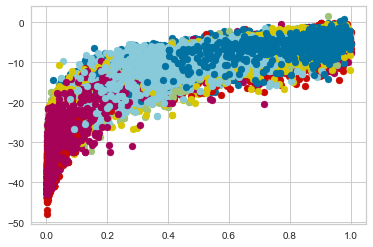

In [520]:
labels = kmeans.predict(X_scaled_df)
clusters = np.unique(labels)
for cluster in clusters:
    row_ix = np.where(labels == cluster)
    pyplot.scatter(X_Num.to_numpy()[row_ix, 1], X_Num.to_numpy()[row_ix, 2])
pyplot.show()

In [545]:
clusters = kmeans.predict(X_scaled_df)
pd.Series(clusters).value_counts().sort_index()

0     1069
1     1416
2     1519
3     1546
4      466
5     1027
6     1632
7      512
8      878
9      561
10    1348
11     711
12    1656
13    1517
14    2552
15    1034
16    2412
17    1203
18     780
dtype: int64

In [546]:
X_Num["cluster"] = clusters
X_Num

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
0,0.468,0.2320,-17.719,0.0414,0.9090,0.399000,0.1270,0.4980,110.033,0
1,0.592,0.0846,-17.672,0.0443,0.9720,0.926000,0.0973,0.0399,84.004,1
2,0.683,0.2990,-18.271,0.1070,0.9900,0.933000,0.1070,0.5460,94.025,15
3,0.653,0.1450,-13.125,0.0661,0.9880,0.912000,0.0982,0.1870,105.710,10
4,0.489,0.1590,-16.841,0.0655,0.9490,0.691000,0.0865,0.2070,92.550,1
...,...,...,...,...,...,...,...,...,...,...
23834,0.720,0.7630,-4.068,0.0523,0.4060,0.000000,0.1800,0.7420,101.965,16
23835,0.803,0.6310,-4.213,0.0444,0.1020,0.000007,0.0858,0.6590,104.999,16
23836,0.728,0.6160,-4.238,0.0645,0.3780,0.000000,0.1050,0.5080,99.962,17
23837,0.654,0.7600,-3.669,0.0450,0.0797,0.000000,0.2990,0.4100,99.945,2


X_Num[X_Num['cluster'] == 2].sample()

In [547]:
kmeans.inertia_

37236.956788327385

Training a K-Means model with 2 clusters! 

Training a K-Means model with 3 clusters! 

Training a K-Means model with 4 clusters! 

Training a K-Means model with 5 clusters! 

Training a K-Means model with 6 clusters! 

Training a K-Means model with 7 clusters! 

Training a K-Means model with 8 clusters! 

Training a K-Means model with 9 clusters! 

Training a K-Means model with 10 clusters! 

Training a K-Means model with 11 clusters! 

Training a K-Means model with 12 clusters! 

Training a K-Means model with 13 clusters! 

Training a K-Means model with 14 clusters! 

Training a K-Means model with 15 clusters! 

Training a K-Means model with 16 clusters! 

Training a K-Means model with 17 clusters! 

Training a K-Means model with 18 clusters! 

Training a K-Means model with 19 clusters! 

Training a K-Means model with 20 clusters! 



Text(0.5, 1.0, 'Elbow Method showing the optimal k')

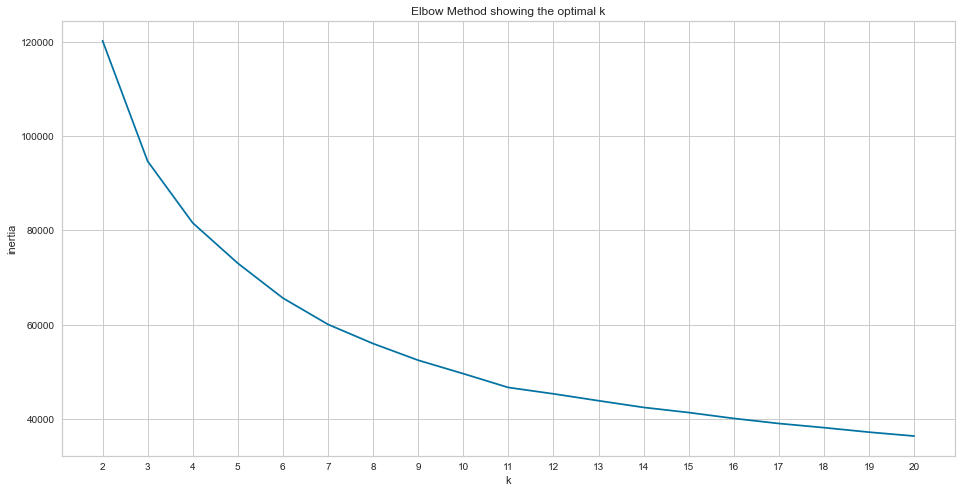

In [478]:
K = range(2, 21)
inertia = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_scaled_df)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

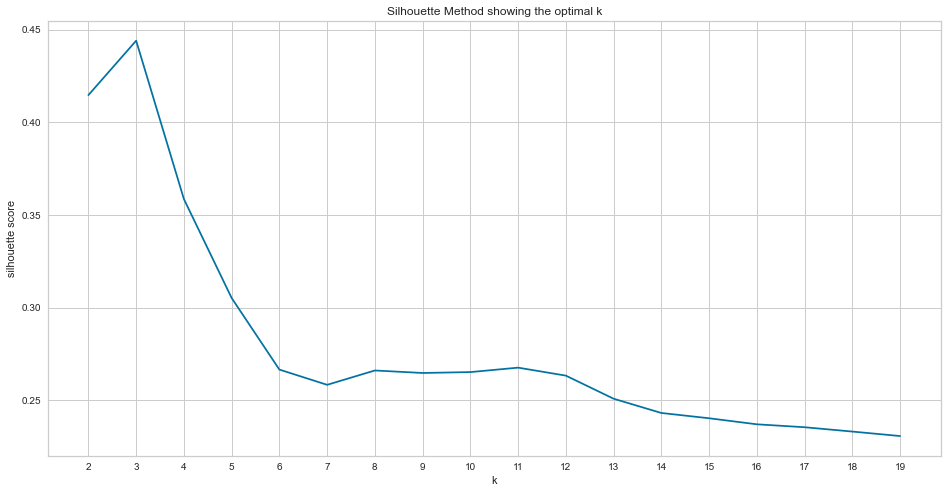

In [479]:
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_scaled_df)
    
    filename = "Modelnew/kmeans_" + str(k) + ".pickle"
    with open(filename, "wb") as f:
        pickle.dump(kmeans,f)
    
    silhouette.append(silhouette_score(X_scaled_df, kmeans.predict(X_scaled_df)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

In [ ]:
#conda install -c districtdatalabs yellowbrick

from yellowbrick.cluster import SilhouetteVisualizer
model = KMeans(3, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X_scaled_df)        # Fit the data to the visualizer
visualizer.show()

In [480]:
import pickle

#scaler = StandardScaler()
#model = KMeans()

with open("Modelnew/scaler.pickle", "wb") as f:
    pickle.dump(scaler,f)

with open("Modelnew/kmeans_spotify.pickle", "wb") as f:
    pickle.dump(kmeans,f)

In [581]:
def load(filename = "filename.pickle"): 
    try: 
        with open(filename, "rb") as f: 
            return pickle.load(f) 
        
    except FileNotFoundError: 
        print("File not found!") 


### Recommendation starts now

In [582]:
extracted_col = X["id"]
X_Num = X_Num.join(extracted_col)
X_Num

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id
0,0.468,0.2320,-17.719,0.0414,0.9090,0.399000,0.1270,0.4980,110.033,1xndf6Ca1bN07LVBhTTyzi
1,0.592,0.0846,-17.672,0.0443,0.9720,0.926000,0.0973,0.0399,84.004,5QHE5Z1jmYOs93zzLPTKwV
2,0.683,0.2990,-18.271,0.1070,0.9900,0.933000,0.1070,0.5460,94.025,6L3lH2OYF1WakhmZKGU8GC
3,0.653,0.1450,-13.125,0.0661,0.9880,0.912000,0.0982,0.1870,105.710,21xlOM3IMcERVNdhZ3W1FY
4,0.489,0.1590,-16.841,0.0655,0.9490,0.691000,0.0865,0.2070,92.550,0oBp8d39TS5sMrbTfW89EJ
...,...,...,...,...,...,...,...,...,...,...
23834,0.720,0.7630,-4.068,0.0523,0.4060,0.000000,0.1800,0.7420,101.965,5knuzwU65gJK7IF5yJsuaW
23835,0.803,0.6310,-4.213,0.0444,0.1020,0.000007,0.0858,0.6590,104.999,1JsUAmsjNz6oGuRTFG93qH
23836,0.728,0.6160,-4.238,0.0645,0.3780,0.000000,0.1050,0.5080,99.962,4Ce37cRWvM1vIGGynKcs22
23837,0.654,0.7600,-3.669,0.0450,0.0797,0.000000,0.2990,0.4100,99.945,09CtPGIpYB4BrO8qb1RGsF


In [583]:
scaler = load("Modelnew/scaler.pickle")

In [584]:
kmean_ = load("Modelnew/kmeans_spotify.pickle")

In [528]:
def input_song():
    name = input('Enter a song: ')
    track = sp.search(q=name,limit=3,market="GB")
    track_id=track["tracks"]["items"][0]["id"]
    
    return track_id
    

In [529]:
from IPython.display import IFrame

track_id = input_song()
#track_id= 'spotify:track:3hgl7EQwTutSm6PESsB7gZ'
IFrame(src="https://open.spotify.com/embed/track/"+track_id,
       width="320",
       height="80",
       frameborder="0",
       allowtransparency="true",
       allow="encrypted-media",
      )

Enter a song: Beethoven


In [552]:
def Recommender():
    audio_feat= sp.audio_features(track_id)
    df_feat=pd.DataFrame(audio_feat)
    df_feat=df_feat[["danceability","energy","loudness","speechiness","acousticness",
    "instrumentalness","liveness","valence","tempo"]]
    audio_features_scaled = scaler.transform(df_feat)
    label=kmeans.predict(audio_features_scaled)[0]
    oursong_ft = X_Num[X_Num['cluster'] == label].sample(1)
    song_id=oursong_ft["id"].values
    
    return song_id[0]
    

In [531]:
def play_song(track_id):
    return IFrame(src="https://open.spotify.com/embed/track/"+track_id,
       width="320",
       height="80",
       frameborder="0",
       allowtransparency="true",
       allow="encrypted-media",
      )
play_song(Recommender())

/Users/divi/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [585]:
def recommender_2():
    name = input('Enter a song: ')
    print("------------------------------")
    track = sp.search(q=name,limit=3,market="GB")
    track_id=track["tracks"]["items"][0]["id"]
    
    audio_feat= sp.audio_features(track_id)
    df_feat=pd.DataFrame(audio_feat)
    df_feat=df_feat[["danceability","energy","loudness","speechiness","acousticness",
    "instrumentalness","liveness","valence","tempo"]]
    audio_features_scaled = scaler.transform(df_feat)
    label=kmeans.predict(audio_features_scaled)[0]
    oursong_ft = X_Num[X_Num['cluster'] == label].sample(1)
    song_id=oursong_ft["id"].values
    print("--------Lets play your choice-------")
    display(play_song(track_id))
    print("--------We suggest that you might like this as well. Lets play it!-------")
    display(play_song(song_id[0]))
    
    return song_id
    
    

In [575]:
recommender_2()

Enter a song: country road
------------------------------


ReadTimeout: HTTPSConnectionPool(host='accounts.spotify.com', port=443): Read timed out. (read timeout=None)

<AxesSubplot:>

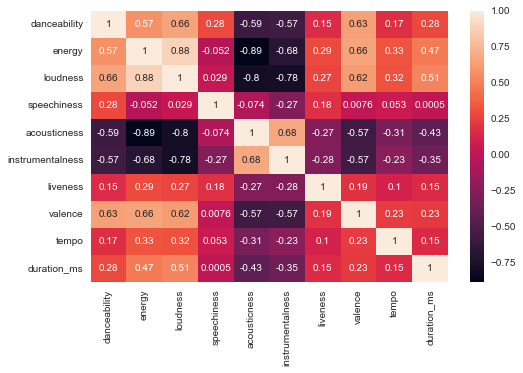

In [591]:
fig=plt.figure(figsize=(8,5))
sns.heatmap(X.corr(),annot=True)